#NOTEBOOK 4: Classification
In this notebook we are going to start entering the realm of actual machine learning (ML) to classify data. We're going to introduce a number of different classsification algorithms, and apply them to our wine dataset.

## Table of Contents
---

* [Logistic Regression](#Logistic_Regression)
* [Data Splitting](#Data_Splitting)
* [Data Standardization](#Data_Standardization)
* [Multiple Logistic Regression](#Multinomial_Logistic_Regression)
* [Performance Metrics for Classification](#Performance_Metrics_for_Classification)
* [Decision Tree](#Decision_Tree)



#Logistic Regression
---
Logistic regression is a basic classification method. It is based on the logistic function which is a general form of the sigmoid function. It is an S-shaped curve that can take any real-valued number in the x-axis and values between 0 and 1 on the y axis. It can be used to classify between two classes (0 and 1). The y value expresses the probability that class 1 occurs.

First, we load the libraries and data.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df['hue']='0'
df2=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
df2['hue']='1'
df_wine = pd.concat([df, df2], ignore_index=True)

To illustrate this strategy, we will take the dataset for red wines and extract the amount of alcohol for wine qualities 3 and 8. Then, we will convert these classes into 0 and 1 to adjust them by logistic regression.

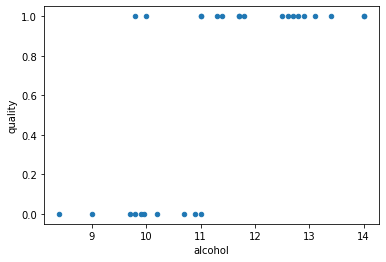

In [ ]:
df_LR=df.loc[(df['quality'] == 3 ) | (df['quality'] == 8 ), ['alcohol','quality']]

df_LR.loc[df_LR.quality == 3, 'quality'] = 0
df_LR.loc[df_LR.quality == 8, 'quality'] = 1

df_LR.plot.scatter(x = 'alcohol', y = 'quality')

We will adjust the data using **seaborn** with the **regplot** function, which allows us to visualize how the data is adjusted to this regression. For more information, please visit the [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html 'seaborn.regplot').

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


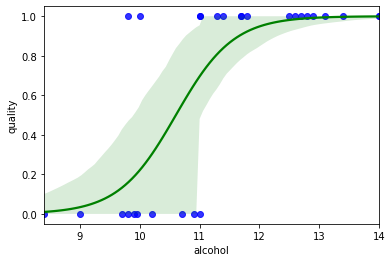

In [ ]:
X = df_LR[['alcohol']]
y = df_LR.quality
sns.regplot(X, y, logistic=True, scatter_kws={'color': 'blue'}, line_kws={'color': 'green'})

Now let's do a logistic regression model using **scikit learn**. We will not use regularization to obtain similar results to those shown using **seaborn**. The regularization considered the effect of outliers in regression and is defined using the constant C. In this case, we use a value of $10^9$, so this high value turns off the regularization. 

For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 'sklearn.linear_model.LogisticRegression').



In [ ]:
from sklearn.linear_model import LogisticRegression
X = df_LR[['alcohol']]
y = df_LR.quality
model = LogisticRegression(C = 1e9)
model.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now we will create a sigmoid function to plot the logistic regression model and then plot it together with the data.

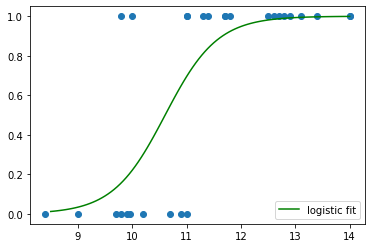

In [ ]:
from scipy.special import expit
x_test = np.linspace(8.5,14.0,100)
# predict dummy y_test data based on the logistic model
y_test = x_test * model.coef_ + model.intercept_
 
sigmoid = expit(y_test)
plt.scatter(X,y)
 
# ravel to convert the 2-d array to a flat array
plt.plot(x_test,sigmoid.ravel(),c="green", label = "logistic fit")
plt.legend(loc="lower right")


#Data Splitting
---

In general, the data is split into two groups before generating a model. These groups are called training and testing sets. The training set is used for developing models and select the parameters that are adequate for the data. The test set is used to assess the performance of the model with previously unseen data. The most common way is to divide the data is random splitting.

We will split the dataset using the function **train_test_split** from **scikit learn**. The training set is 67% of the data and the test set is 33% (We have deliberately specified it that way in the parameters). The `random_state` parameter controls the shuffling applied to the data before applying the split.

 For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 'sklearn.model_selection.train_test_split').


In [ ]:
from sklearn.model_selection import train_test_split

X = df_wine.drop(['quality', 'hue'], axis=1)
y = df_wine['hue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Data Standardization
---

Standardization is a method to transform variables that differ in mean and deviation into comparable values. This process consists of subtracting the means from each feature and then dividing by the feature standard deviation. Many machine learning algorithms assume that all features are centered around zero and have approximately the same variance, then standardization is needed.

In this case, we will use the function **StandardScaler**.  It will first fit the data to determine the mean and standard deviation and then transform it into a standardized form. There are other processes of standardization. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/preprocessing.html 'Preprocessing data')


In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#Multiple Logistic Regression 
---

In this case, we will use all the features with logistic regression to classify white and red wine.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

lr = LogisticRegression(random_state=0) #random_state parameter is provided to control the random number generator used whenever randomization is part of a Scikit-learn algorithm.
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We will test how good is the model's prediction in sorting out data it was not trained with. We will get performance metrics from this comparison. In the next section, we will analyze them carefully.

In [ ]:
y_pred = lr.predict(X_test)
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(y_test, y_pred)))

Accuracy score: 0.9888111888111888

Confusion matrix: 
[[ 544   13]
 [  11 1577]]

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       557
           1       0.99      0.99      0.99      1588

    accuracy                           0.99      2145
   macro avg       0.99      0.98      0.99      2145
weighted avg       0.99      0.99      0.99      2145



#Performance Metrics for Classification
---

The metrics are the values that guide the decision in machine learning. For example, choosing what model performs better or what parameters improve a model by measuring and comparing among different cases. In this section, we are going to analyze some of the most used metrics for the classification task.

Accuracy in this context of classification problems is the number of correct predictions over the total amount of predictions. This metric is useful when the classes to classify are approximately balanced. It is expected that the accuracy is better on the training set than on the test set. 

In [ ]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.3f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.3f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.995
Accuracy in Test  Group   : 0.989


The Confusion Matrix is used for visualized the performance in a classification problem of two or more types of classes. For a binary case as ours, we compared the “Actual” vs “Predicted” values and obtain 4 cases:

*   TP - True Positive
*   TN - True Negative
*   FP - False Positive
*   FN - False Negative


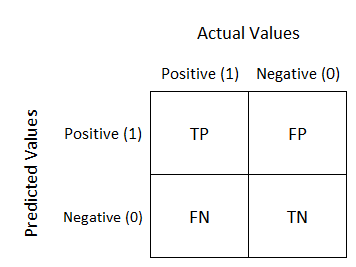

Let's plot the confusion matrix using **matplotlib**.

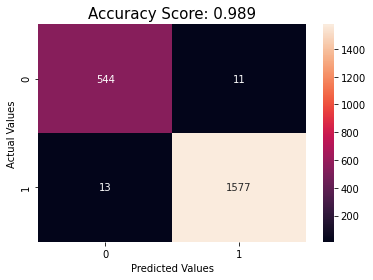

In [ ]:
from sklearn.metrics import confusion_matrix as cm

predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(predictions, y_test)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

The precision is a metric that informs how many positive-predicted instances were actually positive. 

$$ Precision = \frac{TP}{TP + FP}$$

In [ ]:
from sklearn.metrics import precision_score

print("precision score         : ",  precision_score(y_test, predictions, average='micro'))

precision score         :  0.9888111888111888


The recall is a metric that informs how many instances were identified correctly of all the positive classes.

$$ Recall = \frac{TP}{TP + FN}$$

In [ ]:
from sklearn.metrics import recall_score

print("recall score            : ",  recall_score(y_test, predictions, average='micro'))


recall score            :  0.9888111888111888


 The F1-Score is a metric that shows the harmonic mean of precision and recall.

 $$ F1_{Score} = \frac{2 \cdot Recall \cdot Precision} {Recall + Precision} $$

In [ ]:
from sklearn.metrics import f1_score

precision_s = precision_score(y_test, predictions,average='micro')
recall_s    = recall_score(y_test, predictions, average='micro')


print("F1_score     : ",  2*((precision_s*recall_s)/(precision_s + recall_s)))

F1_score     :  0.9888111888111888


#Decision Tree
---

A decision tree is a non-linear technique that splits the dataset into subsets based on a feature value. This step is repeated recursively on each new subset until some criteria are reached. For example, every point in the subset has the same value of the target variable, or a maximum depth is attained. Choosing the feature and value to split is based on reducing the target entropy by dividing into pure subsets. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 'sklearn.tree.DecisionTreeClassifier')

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(y_test, y_pred)))

Accuracy score: 0.9724941724941725

Confusion matrix: 
[[ 522   35]
 [  24 1564]]

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       557
           1       0.98      0.98      0.98      1588

    accuracy                           0.97      2145
   macro avg       0.97      0.96      0.96      2145
weighted avg       0.97      0.97      0.97      2145



An interesting feature of the decision trees is that we can generate an scheme that shows us how the decisions that were made. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html 'sklearn.tree.plot_tree')

[Text(558.0, 380.52, 'X[4] <= 0.149\nentropy = 0.794\nsamples = 4352\nvalue = [1042, 3310]'),
 Text(279.0, 271.8, 'X[6] <= -1.102\nentropy = 0.197\nsamples = 3172\nvalue = [97, 3075]'),
 Text(139.5, 163.07999999999998, 'X[4] <= -0.239\nentropy = 0.915\nsamples = 103\nvalue = [69, 34]'),
 Text(69.75, 54.360000000000014, 'entropy = 0.792\nsamples = 42\nvalue = [10, 32]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.208\nsamples = 61\nvalue = [59, 2]'),
 Text(418.5, 163.07999999999998, 'X[6] <= -0.43\nentropy = 0.075\nsamples = 3069\nvalue = [28, 3041]'),
 Text(348.75, 54.360000000000014, 'entropy = 0.298\nsamples = 379\nvalue = [20, 359]'),
 Text(488.25, 54.360000000000014, 'entropy = 0.029\nsamples = 2690\nvalue = [8, 2682]'),
 Text(837.0, 271.8, 'X[6] <= -0.466\nentropy = 0.72\nsamples = 1180\nvalue = [945, 235]'),
 Text(697.5, 163.07999999999998, 'X[7] <= -0.638\nentropy = 0.127\nsamples = 856\nvalue = [841, 15]'),
 Text(627.75, 54.360000000000014, 'entropy = 0.696\nsamples = 16\nv

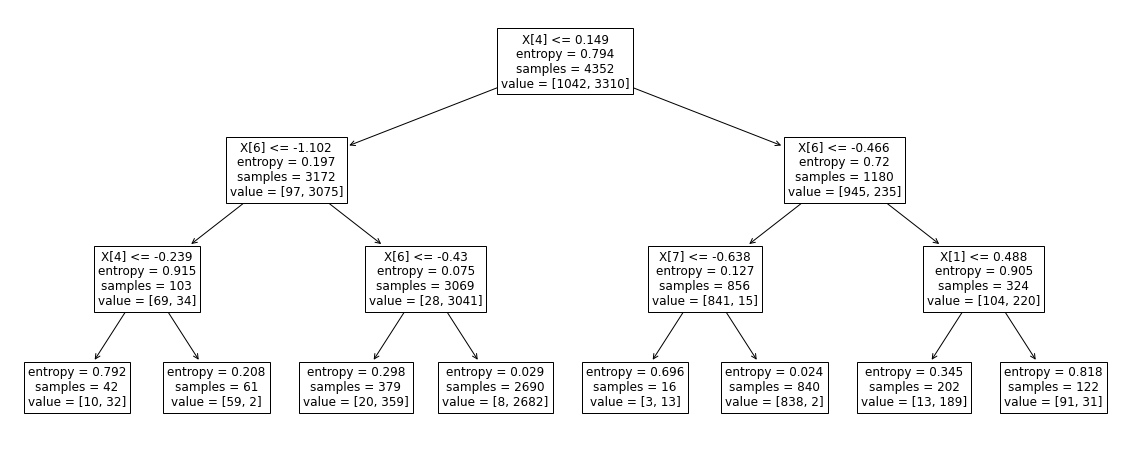

In [ ]:
fig = plt.subplots(figsize=(20, 8))
tree.plot_tree(dt, fontsize=12)

We can generate an interactive Decision Tree, using ipywidget, that changes its max depth.

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

value_max_depth = widgets.IntSlider(value=1, min=1, max=6, step=1, description='max_depth:')

def DecisionTree(valor):
  dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = valor, random_state = 1)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  fig = plt.subplots(figsize=(20+4*valor, 8+valor))
  tree.plot_tree(dt, fontsize=12)


widgets.interact(DecisionTree , valor = value_max_depth);

interactive(children=(IntSlider(value=1, description='max_depth:', max=6, min=1), Output()), _dom_classes=('wi…